# Predictive modeling - final exam summer term 2024

**Date**: 6.7.2024

**Matriculation number**: Please assign your matriculation number to the variable `matriculation_number` by replacing the digits `123` in the cell below with your 8 digits matriculation number. Please do not delete the quotation marks so that the variable is a `string` and not an `int`.

In [1]:
# your 8-digits matriculation number between the quotation marks, then run the cell
matriculation_number = "12345678"

## Instructions (please read this part carefully)
- This exam is carried out in this Jupyter Notebook. All tasks are part of the notebook, all your answers are saved in this notebook.
- Please make sure that you enter your **matriculation number** in the cell above.
- At the end of the exam **please run the last cell of this notebook** to make sure the notebook is **exported to PDF**. It is not a problem if you run this cell more than 1 time, each time you run it, the current version of the notebook is exported to PDF while the previous one is overwritten.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from ISLP.models import ModelSpec as MS

from sklearn.model_selection import(
    KFold,
    cross_validate
)

from sklearn.linear_model import(
    LinearRegression,
    Lasso
)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

## Introducing the dataset
In this exam we are going to work with the `DWD` dataset which contains wheather information from different wheather stations in Germany.

Our objective is to predict the variable **`MEAN ANNUAL RAINFALL`** based on the other variables in the dataset.

The DWD data set consists of 599 rows, each of them representing a particular weather station in Germany, and 21 columns, each of them corresponding to a variable/feature related to that particular weather station. These self-explaining variables are: 
- 'DWD_ID',
- 'STATION NAME',
- 'FEDERAL STATE',
- 'LAT',
- 'LON',
- 'ALTITUDE' above NHN, in m,
- 'PERIOD',
- 'RECORD LENGTH',
- 'MEAN ANNUAL AIR TEMP' in degree Celsius,
- 'MEAN MONTHLY MAX TEMP' in degree Celsius,
- 'MEAN MONTHLY MIN TEMP' in degree Celsius,
- 'MEAN ANNUAL WIND SPEED',
- 'MEAN CLOUD COVER',
- 'MEAN ANNUAL SUNSHINE',
- 'MEAN ANNUAL RAINFALL' in mm,
- 'MAX MONTHLY WIND SPEED',
- 'MAX AIR TEMP' in degree Celsius,
- 'MAX WIND SPEED',
- 'MAX RAINFALL' in mm,
- 'MIN AIR TEMP',
- 'MEAN RANGE AIR TEMP'.

The data was downloaded from the DWD (German Weather Service) data portal on April 21, 2017. Please note that the data set was preprocessed and columns have been renamed.

In [3]:
# please run this cell to load the data
dwd = pd.read_csv(
    'DWD.csv',
    index_col=0,
    sep=',',
)
dwd

,DWD_ID,STATION_NAME,FEDERAL_STATE,LAT,LON,ALTITUDE,PERIOD,RECORD_LENGTH,MEAN_ANNUAL_AIR_TEMP,MEAN_MONTHLY_MAX_TEMP,...,MEAN_ANNUAL_WIND_SPEED,MEAN_CLOUD_COVER,MEAN_ANNUAL_SUNSHINE,MEAN_ANNUAL_RAINFALL,MAX_MONTHLY_WIND_SPEED,MAX_AIR_TEMP,MAX_WIND_SPEED,MAX_RAINFALL,MIN_AIR_TEMP,MEAN_RANGE_AIR_TEMP
ID,,,,,,,,,,,,,,,,,,,,,
0,1,Aach,Baden-Württemberg,47.8413,8.8493,478.0,1931-1986,55,8.2,13.1,...,2.0,67.0,NaN,755.0,2.0,32.5,NaN,39.0,-16.3,9.6
1,3,Aachen,Nordrhein-Westfalen,50.7827,6.0941,202.0,1851-2011,160,9.8,13.6,...,3.0,67.0,1531.0,820.0,3.0,32.3,30.2,36.0,-10.9,7.3
2,44,Großenkneten,Niedersachsen,52.9335,8.2370,44.0,1971-2016,45,9.2,13.2,...,2.0,67.0,1459.0,759.0,3.0,32.4,29.9,32.0,-12.6,7.8
6,71,Albstadt-Badkap,Baden-Württemberg,48.2156,8.9784,759.0,1986-2016,30,7.4,12.2,...,2.0,66.0,1725.0,919.0,2.0,30.2,NaN,43.0,-15.5,8.9
8,73,Aldersbach-Kriestorf,Bayern,48.6159,13.0506,340.0,1952-2016,64,8.4,13.4,...,1.0,65.0,1595.0,790.0,2.0,33.0,NaN,43.0,-19.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,6314,Nossen,Sachsen,51.0507,13.3003,308.0,1949-2016,67,8.5,12.7,...,3.0,57.0,1605.0,657.0,3.0,32.6,25.5,41.0,-17.8,8.2
1009,7135,Aulendorf-Haslach,Baden-Württemberg,47.9655,9.6804,565.0,1950-2004,54,7.8,12.3,...,2.0,70.0,1635.0,875.0,3.0,31.1,NaN,42.0,-17.5,8.6
1011,7244,Neuglobsow (HM),Brandenburg,53.1424,13.0319,62.0,1967-2004,37,8.2,12.4,...,2.0,68.0,1325.0,567.0,2.0,32.0,22.3,34.0,-14.9,8.0


# Part 1: Data Preprocessing and Data Exploration

## Task 1 (2 points)
In the two code cells below some very basic data preprocessing is performed. Describe the preprocessing steps and explain why these steps seem reasonable with the objective in mind that we want to predict the variable `MEAN_ANNUAL_RAINFALL`.

*Hint*: The documentation of the Pandas method [`dropna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) might be useful.

In [4]:
dwd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 0 to 1058
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DWD_ID                  599 non-null    int64  
 1   STATION_NAME            599 non-null    object 
 2   FEDERAL_STATE           599 non-null    object 
 3   LAT                     599 non-null    float64
 4   LON                     599 non-null    float64
 5   ALTITUDE                599 non-null    float64
 6   PERIOD                  599 non-null    object 
 7   RECORD_LENGTH           599 non-null    int64  
 8   MEAN_ANNUAL_AIR_TEMP    598 non-null    float64
 9   MEAN_MONTHLY_MAX_TEMP   597 non-null    float64
 10  MEAN_MONTHLY_MIN_TEMP   595 non-null    float64
 11  MEAN_ANNUAL_WIND_SPEED  588 non-null    float64
 12  MEAN_CLOUD_COVER        588 non-null    float64
 13  MEAN_ANNUAL_SUNSHINE    406 non-null    float64
 14  MEAN_ANNUAL_RAINFALL    586 non-null    f

In [5]:
# Please run this cell to perform the data preprocessing
dwd = dwd.drop(['DWD_ID', 'STATION_NAME', 'FEDERAL_STATE', 'PERIOD'], axis=1)
dwd = dwd.dropna()
dwd.shape

(204, 17)

*Put your description here*

**SOLUTION**:
- First we drop 4 qualitative columns (`DWD_ID`, `STATION_NAME`, `FEDERAL_STATE` and `PERIOD`) which are likely not to be related to our target variable.
- Secondly, we drop all samples which have missing values. This is we do not know how to use samples with missing data when training a model. 

## Task 2 (2 points)
Use the Pandas method [`corr`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) to compute the (Pearson) correlation coefficients between the variables remaining after preprocessing and our target variable `MEAN_ANNUAL_RAINFALL`.

Based on this, which are your 3 top choices you would include into a regression model to predict `MEAN_ANNUAL_RAINFALL`?

In [6]:
# Your code here

# SOLUTION 
dwd.corr()['MEAN_ANNUAL_RAINFALL'].sort_values()

MEAN_ANNUAL_AIR_TEMP     -0.647005
MAX_AIR_TEMP             -0.591738
MEAN_MONTHLY_MAX_TEMP    -0.585887
MEAN_MONTHLY_MIN_TEMP    -0.564027
LAT                      -0.441395
LON                      -0.278280
MEAN_RANGE_AIR_TEMP      -0.215098
MIN_AIR_TEMP             -0.158892
RECORD_LENGTH            -0.043960
MEAN_ANNUAL_SUNSHINE     -0.006196
MAX_MONTHLY_WIND_SPEED    0.142531
MEAN_ANNUAL_WIND_SPEED    0.148666
MAX_WIND_SPEED            0.200972
MEAN_CLOUD_COVER          0.302243
ALTITUDE                  0.758532
MAX_RAINFALL              0.858771
MEAN_ANNUAL_RAINFALL      1.000000
Name: MEAN_ANNUAL_RAINFALL, dtype: float64

*Your top 3 variables here*

**SOLUTION**: The three variables with the strongest (positive or negative) correlation are:
1. `MAX_RAINFALL`
2. `ALTITUDE`
3. `MEAN_ANNUAL_AIR_TEMP`

# Part 2: Modeling
We are now going to create a baseline regression model to predict `MEAN_ANNUAL_RAINFALL`.

## Task 3 (2 points)
Create a simple linear regression model for the response variable `MEAN_ANNUAL_RAINFALL` using `ALTITUDE` as unique predictor. Use [`statsmodels.OLS`](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) for creating your model and use the [`summary()`](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.summary.html) method to output the summary information on your model.

In [6]:
# Your code here

# SOLUTION
predictors = ['ALTITUDE']
design = MS(predictors)
design.fit(dwd)
X = design.transform(dwd)
y = dwd['MEAN_ANNUAL_RAINFALL']

model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     MEAN_ANNUAL_RAINFALL   R-squared:                       0.575
Model:                              OLS   Adj. R-squared:                  0.573
Method:                   Least Squares   F-statistic:                     273.7
Date:                  Tue, 01 Jul 2025   Prob (F-statistic):           1.98e-39
Time:                          08:33:55   Log-Likelihood:                -1313.0
No. Observations:                   204   AIC:                             2630.
Df Residuals:                       202   BIC:                             2637.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    594.4032     14.015     42.411      0.000     566.768     622.038
ALTITUDE       0.5935      0.036     16.544      0.000       0.523       0.664
==============================================================================
Omnibus:                       25.146   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.672
Skew:                           0.760   Prob(JB):                     2.96e-08
Kurtosis:                       4.329   Cond. No.                         515.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Task 4 (4 points)
In this task we investigate further our baseline model.

### Task 4.1 (1 point)
What is the regression coefficient for the predictor variable `ALTITUDE`? How would you explain this coefficient to a fellow student who has never heard of linear regression models?

In [8]:
# Your coefficient here

# SOLUTION
altitude_coefficient = results.params['ALTITUDE']
altitude_coefficient

0.5934938365335676

*Your explanation of the coefficient here*

**SOLUTION**:
The coefficient is approximately 0.59. This means that our model predicts that for each additional meter of altitude, the yearly mean rainfall increases by 0.59mm.

### Task 4.2 (1 point)
Is there statistical evidence that there is a relationship between the predictor variable `ALTITUDE` and the response variable `MEAN_ANNUAL_RAINFALL`? Justify your answer.

*Your answer here*

**SOLUTION**:
The $p$-value for the regression coefficient of `ALTITUDE` estimated by our model is smaller than $10^{-3}$. Thus, we can confidently say that there is statistical evidence of a positive relationship between `ALTITUDE` and `MEAN_ANNUAL_RAINFALL`.

### Task 4.3 (1 point)
Ingolstadt lies on an average altitude of 374m above NHN. Compute your model's prediction of the yearly average rainfall at Ingolstadt.

(As a side note not relevant for your answer: The true mean yearly rainfall in Ingolstadt based on average data from 2005-2015 is 574.1 mm).

In [9]:
# Your code here

# SOLUTION
new_data = pd.DataFrame({
    'ALTITUDE' : [374]
})
newX = design.transform(new_data)
IN_prediction = results.predict(newX)
IN_prediction

0    816.369908
dtype: float64

### Task 4.4 (1 point)
What is your overall assessment of the model (taking into account the model summary produced in Task 3, the regression plot and the residual plot produced by running the two cells below)?

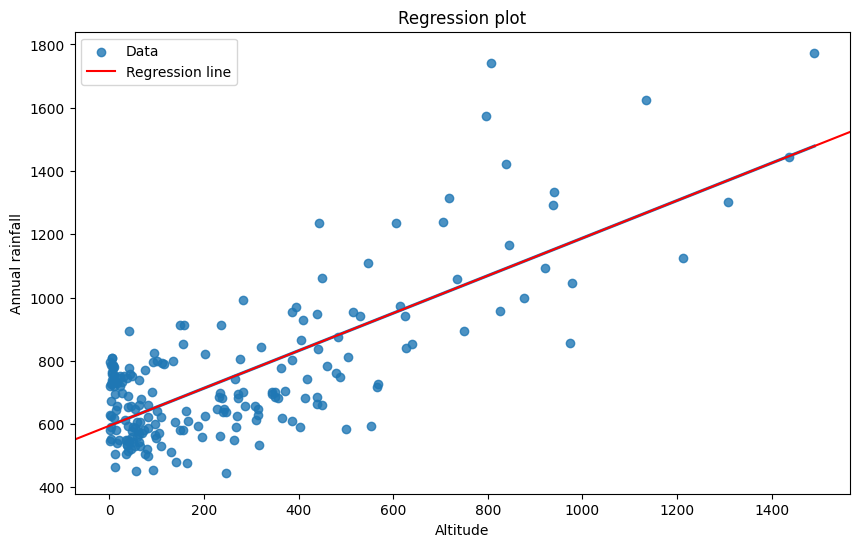

In [7]:
# Run this cell to produce a regression plot
fig, ax = plt.subplots(figsize=(10,6))
resid = results.resid
y_true = y
sns.regplot(x = 'ALTITUDE',
            y = 'MEAN_ANNUAL_RAINFALL',
            data = dwd,
            ci = 0,
            label = 'Data');
sm.graphics.abline_plot(model_results=results, ax=ax, color="red", label="Regression line")
ax.set_xlabel('Altitude');
ax.set_ylabel('Annual rainfall');
ax.legend(loc="best");
ax.set_title("Regression plot");
plt.savefig('regression_plot.png')

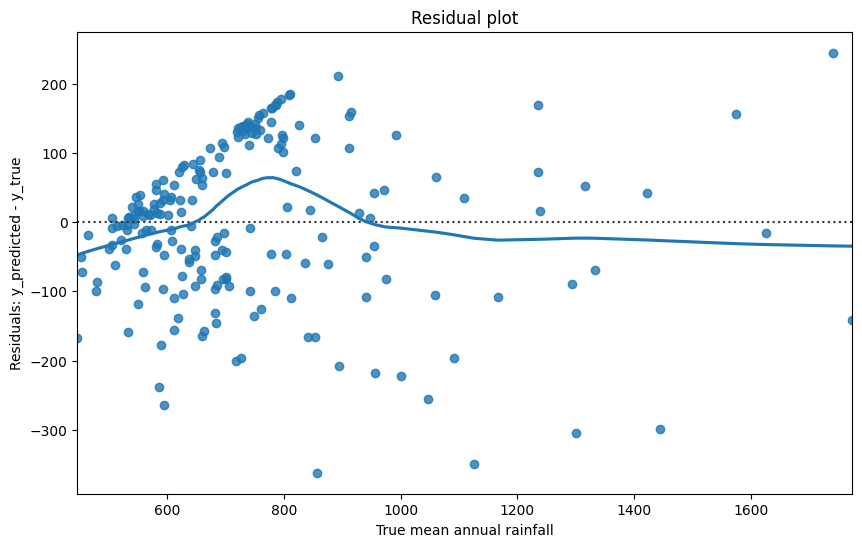

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
resid = results.resid
y_true = y
sns.residplot(x = y_true,
              y = resid,
              lowess = True); #fits a curve through the residuals
ax.set_xlabel('True mean annual rainfall');
ax.set_ylabel('Residuals: y_predicted - y_true');
ax.set_title('Residual plot');
plt.savefig('residual_plot.png')

*Your assessment here*

**SOLUTION**:
Taking into account the $R$-value of 0.575 and the two plots, the model looks like a valid baseline model.

However, the two plots also show some deficiencies of the model. For example, it seems that there are many datapoints with `ALTITUDE` value close to zero. The model's predictive power is obviously not very strong for these datapoints.

# Part 3: Comparing various models
In this section we compare different models with $5$-fold cross validation.

## Task 5 (2 points)
Estimate the test error of our baseline model from Part 2 (simple linear regression to predict `MEAN_ANNUAL_RAINFALL` based on the single predictor `ALTITUDE`) using $5$-fold cross validation. Make sure your data is shuffled before doing cross validation.

*Comments*: 
- We use [`sklearn.model_selection.KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) as a cross validator.
- We use [`sklearn.model_selection.cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) to compute the cross validation test errors.
- Note that we use the scoring metric `neg_mean_squared_error` (see the [overview of Metrics and scoring](https://scikit-learn.org/stable/modules/model_evaluation.html)) which produces negative values for reasons of consistency within ScikitLearn.
- For consistency with subsequent tasks we use [`sklearn.linearmodels.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) instead of `sm.OLS` for the simple linear regression model.

In [13]:
# In this cell, replace ... with your code
#cross_val = KFold(...)
cross_val = KFold(n_splits = 5, # SOLUTION
                  shuffle = True,
                  random_state = 42)
model = LinearRegression()
X = dwd[['ALTITUDE']] # note: Sklearn wants a DataFrame not a Series as X, which is why we use a double square bracket
y = dwd.MEAN_ANNUAL_RAINFALL
cv_results = cross_validate(model,
                           X,
                           y,
                           cv = cross_val,
                           scoring = 'neg_mean_squared_error')
#cv_err_baseline = ...
cv_err_baseline = -np.mean(cv_results['test_score']) # SOLUTION
cv_err_baseline

23171.92008598669

## Task 6 (1 point)
In Task 7 we are going to train a Lasso model. Before doing so, we need to preprocess our data using the sklearn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) which will be part of a sklearn [`pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

Explain what the `StandardScaler` does to the data and **why** it is necessary to perform this step before training a Lasso model.

*Your explanation here*

**SOLUTION**:
The standard scaler standardizes each variable, that is, from each variable it subtracts the mean and divides by the standard deviation so that all variables have mean 0 and standard deviation 1. This is necessary to make sure that all variables are on the same scale which is important because otherwise the Lasso functional penalizes variables on different scales differently, i.e. Lasso would inherently prefer to include variables on a bigger scale as opposed to variables on a smaller scale.

## Task 7 (1 point)
In the cell below, a vector `cv_err_Lasso` is computed. Provide a detailed explanation of the entries of this vector.

In [13]:
# Just run this cell. Do not change it.
alphas_L = np.arange(0.5, 2, 0.01)
n = len(alphas_L)
cv_err_Lasso = np.zeros(len(alphas_L))

cv = KFold(n_splits = 5,
                  shuffle = True,
                  random_state = 42)

X = dwd.drop(['MEAN_ANNUAL_RAINFALL'], axis=1)

for i in range(n):
    a = alphas_L[i]
    model = make_pipeline(StandardScaler(), Lasso(alpha=a))
    cv_results = cross_validate(model,
                               X,
                               y,
                               cv = cv,
                               scoring = 'neg_mean_squared_error')
    cv_err_Lasso[i] = - np.mean(cv_results['test_score'])

*Your explanation here*

**Solution**:
The vector contains the estimated test MSE using 5-fold cross validation of Lasso models using all variables as predictors for values of $\lambda$ ranging from $0.5$ to $2$ in steps of $0.01$.

## Task 8 (1 point)
Based on what you have seen above: Which model would you use to predict `MEAN_ANNUAL_RAINFALL` with the predictors given in the `DWD` dataset? Provide all parameters necessary to train this model.

In [14]:
# Space for code if needed

## SOLUTION
alpha = alphas_L[np.argmin(cv_err_Lasso)]
alpha

cv_err_Lasso[np.argmin(cv_err_Lasso)]

5873.111736188736

*Your answer here*

**SOLUTION**
The best model is a Lasso model involving all predictors and using the parameter $\lambda = 1.88$. This model has an estimated test MSE of 5.873 compared to 23.172 for the baseline mode.

# Part 4: Conceptual questions

## Task 9 (2 points)
Assume you train a logistic regression model to predict if it is raining in the following day ($y=1$) or not ($y=0$) based on three predictors: 
- $x_1 = \text{cumulated amount of rain in the past 24 hours}$,
- $x_2 = \text{summer}$ (dummy-encoded with $1$ meaning it is currently summer) and
- $x_3 = \text{percentage of cloud cover in the past 24 hours}$. 

The estimated coefficients of your model are $\beta_0  = 0, \beta_1 = 0.02, \beta_2 = 0.015, \beta_3 = 0.02$. What does your model predict on a winter day if $x_1 = 10$ and $x_3 = 80$? Justify your answer.

In [15]:
# free space for code if needed

# SOLUTION
import math
beta0 = 0
beta1 = 0.02
beta2 = 0.015
beta3 = 0.02

x1 = 10
x2 = 0
x3 = 80

your_models_predicted_probability = math.exp(beta0 + beta1*x1 + beta2*x2 + beta3*x3)/(1+math.exp(beta0 + beta1*x1 + beta2*x2 + beta3*x3))
your_models_predicted_probability

0.8581489350995122

*Your answer here*

**Solution**:
The model predicts a probability of $85.8\%$ of rain. Since we would typically cut at $50\%$ we would interpret this as the model predicting rain on the following day.

## Task 10 (2 points)
Assume you have trained a simple linear regression model to estimate the mean yearly rainfall depending of a location based on its altitude. Explain carefully all steps you would need to perform in oder to estimate the standard deviation of your model's prediction for the city of Ingolstadt located a an altitude of 374m using **the bootstrap**.

*Your answer here*
**Solution**:

1. Create 1,000 bootstrap samples from the training set (same size, sampling with replacement)
2. For each of these bootstrapped training samples, train a linear regression model to predict the mean annual rainfall based on the predictor ALTITUDE.
3. For each of the models trained in Step 2, compute the mean annual rainfall for a new datapoint with ALTITUDE 374.
4. Compute the sample standard deviation of the 1,000 estimates for the mean annual rainfall from Step 3. This value is our estimate of the standard deviation.

# Part 5: Handing your exam in

## Task 11 (0 points)
Save your final Notebook by pressing "File"->"Save Notebook". Make sure you assigned your 8 digits matriculation number as a string to the variable `matriculation_number` in one of the first cells of this notebook.  

After this, run the cell below to export you Notebook to PDF format.

In [16]:
filename = str(matriculation_number) + '_exam.pdf'
!jupyter nbconvert Exam.ipynb --to pdf --output $filename

[NbConvertApp] Converting notebook Exam.ipynb to pdf
[NbConvertApp] Support files will be in 12345678_exam_files/
[NbConvertApp] Making directory ./12345678_exam_files
[NbConvertApp] Writing 41601 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 163813 bytes to 12345678_exam.pdf


---

**Copyright note**: The dataset, the prerpocessing and the idea for this case study are taken from the SOGA-Py project of the Department of Earth Sciences from Freie Universität Berlin by Annette Rudolph, Joachim Krios and Kai Hartmann. They are shared under a Creative Commons license.